# Iteration 1: Clustering using K-Means

In [2]:
#import the original dataset provided by the AI-research group
import pandas as pd
from pandas import DataFrame
df = pd.read_csv(r"Files/portfolio_data_anonymized.csv", sep =',', engine ='python', encoding='utf-8', error_bad_lines=False)

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 24 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   Student ID                                 50 non-null     int64  
 1   School ID                                  50 non-null     int64  
 2   Regio                                      50 non-null     int64  
 3   Leeftijd                                   50 non-null     int64  
 4   Leerjaar                                   50 non-null     int64  
 5   Leerweg                                    50 non-null     int64  
 6   Foto                                       50 non-null     int64  
 7   Plaatje                                    50 non-null     int64  
 8   Video                                      50 non-null     int64  
 9   Mijn vervolgstap / mijn vervolgkeuze is.1  47 non-null     object 
 10  Over 5 jaar zou ik het liefs

In [4]:
df_rec = df[df.columns[[0, 1, 2, 3, 4, 5, 6, 7, 8, 20, 21, 22, 23]]]
df_rec.head()

,Student ID,School ID,Regio,Leeftijd,Leerjaar,Leerweg,Foto,Plaatje,Video,sentiment_score,word_count,char_count,avg_word
0,162426,145,7,15,4,3,0,0,1,0,23,113,3.956522
1,162429,145,7,16,4,3,0,0,1,0,20,94,3.750000
2,162431,145,7,15,4,3,0,0,1,2,80,388,3.862500
3,162437,145,7,15,4,3,0,0,1,1,62,306,3.951613
4,162438,145,7,15,4,3,0,0,1,0,15,75,4.357143


In [5]:
from pandas import DataFrame
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans #The KMeans algorithm

kmeans = KMeans(n_clusters=20).fit(df_rec)
centroids = kmeans.cluster_centers_
centroids #The X- and Y axis of the centroids

array([[ 1.62440000e+05,  1.45000000e+02,  7.00000000e+00,
         1.57500000e+01,  4.00000000e+00,  3.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  1.00000000e+00,
         2.50000000e+00,  7.77500000e+01,  3.86750000e+02,
         4.00139658e+00],
       [ 1.99421500e+05,  1.11000000e+02,  7.00000000e+00,
         1.60000000e+01,  4.00000000e+00,  2.50000000e+00,
         1.00000000e+00,  1.00000000e+00,  1.00000000e+00,
         5.00000000e-01,  9.50000000e+00,  4.60000000e+01,
         4.16666667e+00],
       [ 1.88495000e+05,  1.11000000e+02,  7.00000000e+00,
         1.50000000e+01,  4.00000000e+00,  4.00000000e+00,
         1.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         3.00000000e+00,  6.40000000e+01,  3.26000000e+02,
         4.10937500e+00],
       [ 1.64646000e+05,  1.45000000e+02,  7.00000000e+00,
         1.60000000e+01,  4.00000000e+00,  3.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  1.00000000e+00,
        -1.00000000e+00,  2.70000000e

In [6]:
df_rec['cluster'] = kmeans.fit_predict(df_rec) #Every participant will have their cluster assigned
df_rec.head(8)

<ipython-input-6-2e9b63781e52>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_rec['cluster'] = kmeans.fit_predict(df_rec) #Every participant will have their cluster assigned


,Student ID,School ID,Regio,Leeftijd,Leerjaar,Leerweg,Foto,Plaatje,Video,sentiment_score,word_count,char_count,avg_word,cluster
0,162426,145,7,15,4,3,0,0,1,0,23,113,3.956522,1
1,162429,145,7,16,4,3,0,0,1,0,20,94,3.750000,1
2,162431,145,7,15,4,3,0,0,1,2,80,388,3.862500,16
3,162437,145,7,15,4,3,0,0,1,1,62,306,3.951613,4
4,162438,145,7,15,4,3,0,0,1,0,15,75,4.357143,1
5,162439,145,7,17,4,3,0,0,1,1,59,301,4.673077,4
6,162441,145,7,16,4,3,0,0,1,3,77,375,3.883117,16
7,162442,145,7,16,4,3,0,0,1,1,71,387,4.464789,16


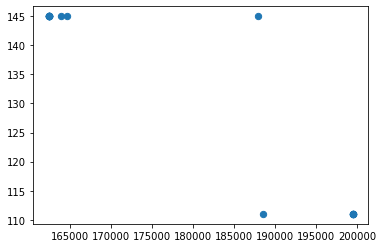

In [7]:
plt.scatter(centroids[:, 0], centroids[:, 1], s=40)
plt.show()